# Recurrent Neural Networks
## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


## Importing the training set

In [4]:

# we are going to train it on training set
# only
# we want to create a np array from below column
training_set = dataset_train.iloc[:, 1:2].values

In [5]:
# .values creates numpy arrays
training_set.values

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

* For RNN we use normalization for feature scaling as we have sigmoid func
in the output layer of RNN
* apply minmax from sklearn

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
# all the new stock prices will be in 0 to 1

In [7]:
training_set_scaled = sc.fit_transform(training_set)
# fit means it is going to get min of the data and max of the data
#  transform method it is going tocompute for each of the stock prices

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

* Now we will create a specific data structure for RNN (important) that what the RNN
will need to remember when predicting the next stock price called NUMBER OF TIME STEPS

* Wrong number of time steps will lead to overfitting or nonsense predictions

## Creating a data structure with 60 time steps and 1 output

* at each time t the RNN is going to look back at 60 stock prices before time t and based
on the trends its captures during 60 previous timesteps it will try to predict the next output.
* One month has 20 days so 60 days means from 3 month previous we will try to predict the next output. 

* Here x_train which will be input to NN
* y_train will be output

In [9]:
x_train = []
y_train = []
# as we are going to get 60 previous stock prices we are going to start from 60th observation in for loop
for i in range(60, len(training_set_scaled)):
    x_train.append(training_set_scaled[i-60:i, 0]) # upper bound get excluded, 0 means 1 column
    y_train.append(training_set_scaled[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train
# the first line of observation corr to time t=60 (59 values) (row wise)
# the  second line of observation corr to time t=61 (row wise
# we ahve sliding window kind of observations

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

* We have to add a new dimension to this structure
* to predict price we dont have to do with only price but also other columns in data set like
close, volume columns.

## Reshaping The data 

* adding some even more dimensionality
* adding more indicator from our dataset to help better predict

In [12]:
len(x_train), x_train.shape[0], x_train.shape[1]

(1198, 1198, 60)

* x_train is 2D in shape 1198lines ,60 columns
* we are going to add this new dimension and convert to 3D
* the 3rd dimension will correspond to the indicators
* look for keras doc --> recurrent layers -->input shapes
* here we have the 3D tensor with shape (number of observations or number of batches,
                                        timestops, input dimensions of indicators)


In [13]:
# we have only 1 indicator here so 1 that is open google stock price
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [14]:
x_train # 3D tensor

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

## Building The RNN

* Making a stacked LSTM with some dropout regulization to prevent overfitting

### Import the keras libraries and packages

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout


### Initialize our RNN

* We are going to initialize our RNN as a sequence of layers as opposed to a 
computional graph


In [16]:
regressor = Sequential()


* regressor is now an object of sequential class which represenets exactly sequence of 
layers
* This time we are predicting a continous output, which is google stock price at time t+1
and so we are doing some regression

### Adding the first LSTM layer and some dropout regularisation to prevent overfitting

* here we are adding LSTM object by using add method
* the 3 argument are number of units = number of lstm cells or units,
* return sequences = True becoz we are building a stacked LSTM which has several LSTM layers
* after stacking the last layer set return seq = False
* input_shape = shape of input of xtrain in 3D, but in this 3rd argument of LSTM class we dont have
to include the 3D only the 2 last one corr to time steps and indicators because the 1st one 
corr to observations will be automatically taken into account


In [17]:
# units are basically number ofneurons
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))

In [18]:
# here dropout means the rate of neurons we wanna drop in the layers to do this regurilization
# 20% neurons of lstm layer will be ignored during training forward and backward
# propogation
# 0.2*50 = 10 neuron will drop dropped during each iteration of training
regressor.add(Dropout(rate = 0.2))

### Adding the second LSTM layer and some dropout regularisation

In [19]:
# do not add input shape here
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding the third LSTM layer and some dropout regularisation

In [20]:
# do not add input shape here
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(rate = 0.2))

### Adding the forth LSTM layer and some dropout regularisation

In [21]:
# This is the forth lstm layer, not final layer of RNN but after this comes the final layer 
regressor.add(LSTM(units = 50, return_sequences = False))
regressor.add(Dropout(rate = 0.2))
# after this we are not going to return any more sequences so set return_sequences = False

### Adding the output layer

In [22]:
# we are not adding an lstm layer but a classic fully conn layer so use dense  class
regressor.add(Dense(units = 1))

### Compile the RNN

* For RNN optimizer rmsprop is recommended but also adam is good
* loss = this is regression problem and we are predicting a continous value so
use mean squared error

In [24]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Fitting the RNN to the training set

In [25]:
regressor.fit(x = x_train, y = y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 20s 101ms/step - loss: 0.0460
Epoch 2/100
38/38 [==============================] - 4s 95ms/step - loss: 0.0067
Epoch 3/100
38/38 [==============================] - 4s 96ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0054
Epoch 6/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0044
Epoch 8/100
38/38 [==============================] - 4s 99ms/step - loss: 0.0050
Epoch 9/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0044
Epoch 10/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 4s 100ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 4s 98ms/step - loss: 0.0039
Epoch 13/100
38/38 

38/38 [==============================] - 4s 95ms/step - loss: 0.0014


* if our loss is too small then we might get overfitting and we will get great loss reduced on
training data but very bad loss on test data
* So after 100 Epochs our loss is 0.0014

## Making Predictions and visualizing the results

### Getting the real stock price of jan 2017

In [26]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [27]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

### Getting the predicted stock price of 2017

*1)  We trained our model to be able to predict the stock price at time t+1 based on 60
previous stock prices and therefore to predict each stock price of each financial day of 2017
we will need 60 previous stock prices of 60 previous financial days before the actual day

*2) In order to get each day of 2017 jan the 60 previous stock prices of 60 previous days
we will need both test and training sets(December 2016) so we have to concatenate it

*3) We cant concatenate the training_set and test_set(real_stock_price) will lead us to a problem
* As we concate above 2 we will need to scale training and test sets but if we do that we will change actual
test values
* So to handle this problem by making another concatenation which will be to concatenate the
original dataframes those are dataset_train and dataset_test and get google stock price
..after this we will get input of each prediction (60 previous prices) and this is what we will scale to get predictions
* That way we are only scaling the inputs and not changing the actual values
* as our RNN was trained on scaled inputs so for predictions we have to scale training too

In [28]:
dataset_total = pd.concat((dataset_train['Open'] ,dataset_test['Open']), axis = 0)

In [39]:
# to predict the stock prices of jan 2017..for the first day of 2017 we will need 60 previous days
# first financial day is jan 3
# lower bond = jan3 - 60 days...
# upper bound = last financial day = last financial day of jan - 60
# so the last stock price we will need input will be previous stock price just before
# the last stock price we predict and this will be last stock price of our dataset
# len(dataset_total)-len(dataset_test) gets jan 3
inputs = dataset_total[len(dataset_total)-len(dataset_test) - 60:].values

In [40]:
# it is not shaped in right way
inputs.shape

(80,)

In [42]:
inputs = inputs.reshape(-1,1)
inputs.shape

(80, 1)

* now to get 3D format expected by neural network for predictions
* before that we need to scale our inputs

In [43]:
# as our sc objected was already fitted to training set use only transform method
# scaling we applied for input should be same that of training set
inputs = sc.transform(inputs)

F:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [44]:
inputs.shape[0]

80

In [45]:
x_test = []
# jan 2017 has 20 financialdays
# as we are going to get 60 previous stock prices we are going to start from 60th observation in for loop
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i, 0]) # upper bound get excluded, 0 means 1 column (google stock price  column)

x_test = np.array(x_test)

In [46]:
# to convert to 3d format
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Making Predictions

In [47]:
predicted_stock_price = regressor.predict(x_test)

1/1 [==============================] - 4s 4s/step


In [48]:
# inverse the scaling of our predictions to get our original scale

In [49]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [50]:
predicted_stock_price

array([[785.1856 ],
       [782.43176],
       [782.4509 ],
       [783.70636],
       [787.0941 ],
       [793.1676 ],
       [798.958  ],
       [801.64453],
       [802.1859 ],
       [801.7293 ],
       [801.03375],
       [800.3405 ],
       [799.8859 ],
       [800.30817],
       [801.3264 ],
       [806.0315 ],
       [813.21124],
       [821.1414 ],
       [825.7932 ],
       [822.1087 ]], dtype=float32)

## Visualizing The Results

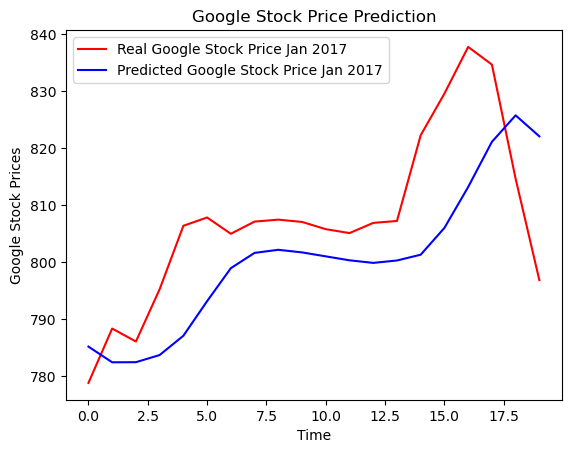

In [51]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price Jan 2017')
plt.plot(predicted_stock_price, color = 'Blue', label = 'Predicted Google Stock Price Jan 2017')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Prices')
plt.legend()
plt.show()

## Comments


* We can see our model laggining behind actual values -- Because it cannot react
to fast, non linear changes fastly... that last spike is non linear change
* Our model reacts good to smooth changes and manages to follow upward and downward 
trends